<a href="https://colab.research.google.com/github/eyesimk/CS412-MachineLearning/blob/main/hw1_kebabci_eceyesim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Load training dataset

*  Read from Keras library.



In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np
from keras.datasets import mnist

# Read data 
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [ ]:
# print shape
print('Data Dimensionality: ')
print ("Train X, Y shape: ", x_train.shape, y_train.shape )
print ("Test X, Y shape: ", x_test.shape, y_test.shape)


# print first 5 rows in your dataset
train_df = pd.DataFrame(x_train.reshape(60000, -1))
train_df['label'] = y_train
print('Head of Data: ')
print(train_df.head())

# print attribute names
print ("Attribute Names: ", train_df.columns.tolist())




Data Dimensionality: 
Train X, Y shape:  (60000, 28, 28) (60000,)
Test X, Y shape:  (10000, 28, 28) (10000,)
Head of Data: 
   0  1  2  3  4  5  6  7  8  ...  776  777  778  779  780  781  782  783  label
0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      5
1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      0
2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      4
3  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      1
4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      9

[5 rows x 785 columns]
Attribute Names:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 8

##2) Shuffle and split training data as train(80%) and validation(20%) 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the training data

x_train,y_train = shuffle (x_train, y_train, random_state=42)


# Split 80-20

x_ntrain, x_valid, y_ntrain, y_valid = train_test_split(x_train,y_train, test_size=2/10, random_state=42)
print("Train data shape:", x_ntrain.shape, "Train label shape:",y_ntrain.shape, "Validation data shape:", x_valid.shape, "Validation label shape:", y_valid.shape)
ntrain_df = pd.DataFrame(x_train.reshape(60000, -1))
valid_df = pd.DataFrame(x_valid.reshape(len(x_valid), -1))

print("New train set",ntrain_df.head())
print("Validation set",ntrain_df.head())


Train data shape: (48000, 28, 28) Train label shape: (48000,) Validation data shape: (12000, 28, 28) Validation label shape: (12000,)
New train set    0    1    2    3    4    5    6    ...  777  778  779  780  781  782  783
0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
4    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0

[5 rows x 784 columns]
Validation set    0    1    2    3    4    5    6    ...  777  778  779  780  781  782  783
0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
2    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
3    0    0    0    0    0    0    0  ...  

##3) Training a decision tree classifier on train data and model selection using the validation data



Accuracy for minimum samples split 2 for validation:  0.8640833333333333
Accuracy for minimum samples split 5 for validation:  0.8688333333333333
Accuracy for minimum samples split 10 for validation:  0.86825
Accuracy for minimum samples split 2 for training:  1.0
Accuracy for minimum samples split 5 for training:  0.9821041666666667
Accuracy for minimum samples split 10 for training:  0.9648541666666667


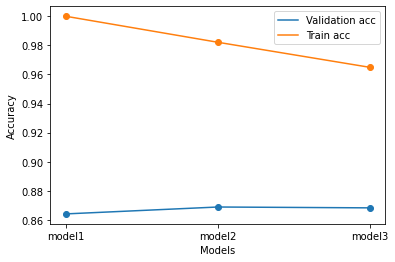

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics

# Train decision tree classifiers
# random state parameter to have the same random value each run

class_2 = DecisionTreeClassifier(min_samples_split = 2, random_state = 42)
class_5 = DecisionTreeClassifier(min_samples_split = 5, random_state = 42)
class_10 = DecisionTreeClassifier(min_samples_split = 10, random_state = 42)

x_ntrain_reshaped = x_ntrain.reshape((48000,28*28))
class_2.fit(x_ntrain_reshaped,y_ntrain)
class_5.fit(x_ntrain_reshaped,y_ntrain)
class_10.fit(x_ntrain_reshaped,y_ntrain)

# Evaluate on validation set

valid_2 = class_2.predict(x_valid.reshape(len(x_valid),-1))
valid_5 = class_5.predict(x_valid.reshape(len(x_valid),-1))
valid_10 = class_10.predict(x_valid.reshape(len(x_valid),-1))


val_acc1 = metrics.accuracy_score(y_valid,valid_2)
val_acc2 = metrics.accuracy_score(y_valid,valid_5)
val_acc3 = metrics.accuracy_score(y_valid,valid_10)

y_train1 = class_2.predict(x_ntrain.reshape(len(x_ntrain),-1))
y_train2 = class_5.predict(x_ntrain.reshape(len(x_ntrain),-1))
y_train3 = class_10.predict(x_ntrain.reshape(len(x_ntrain),-1))

train_acc1 = metrics.accuracy_score(y_ntrain,y_train1)
train_acc2 = metrics.accuracy_score(y_ntrain,y_train2)
train_acc3 = metrics.accuracy_score(y_ntrain,y_train3)

print("Accuracy for minimum samples split 2 for validation: ", val_acc1)
print("Accuracy for minimum samples split 5 for validation: ",val_acc2)
print("Accuracy for minimum samples split 10 for validation: ", val_acc3)

print("Accuracy for minimum samples split 2 for training: ", train_acc1)
print("Accuracy for minimum samples split 5 for training: ",train_acc2)
print("Accuracy for minimum samples split 10 for training: ", train_acc3)



# Plot errors 

x_axis = ['model1', 'model2', 'model3']
train_acc = [train_acc1, train_acc2, train_acc3]
val_acc = [val_acc1, val_acc2, val_acc3]
plt.scatter(x_axis, val_acc)
plt.scatter(x_axis, train_acc)
plt.plot(x_axis, val_acc, label = "Validation acc")
plt.plot(x_axis, train_acc, label = "Train acc")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## 4) Testing with the chosen classifier on test set
 

In [ ]:
from sklearn.metrics import accuracy_score
# Load test data
# already loaded in the first section

test_df = pd.DataFrame(x_test.reshape(len(x_test), -1))
test_df['label'] = y_test
print(test_df.head())

# test prediction using a decision tree with all default parameters and ..... min-split value 
x_test_reshape = x_test.reshape((10000,28*28))
#test_1 = class_2.predict(x_test_reshape)
test_2 = class_5.predict(x_test_reshape)
#test_3 = class_10.predict(x_test_reshape)


# Report your accuracy
test_acc = metrics.accuracy_score(y_test,test_2)
print("Accuracy for minimum samples split 5 for test: ", test_acc)





   0  1  2  3  4  5  6  7  8  ...  776  777  778  779  780  781  782  783  label
0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      7
1  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      2
2  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      1
3  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      0
4  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0      4

[5 rows x 785 columns]
Accuracy for minimum samples split 5 for test:  0.8667


##5) Report 



In this assignment, I aimed to develop a Decision Tree Classifier to find the most accurate classifier that will predict the digits in the images in the MNIST dataset. For the dataset, the train set and test set are loaded separately from Keras. The size of the train set is 60000, while the size of the test set is 10000. To generate a validation set, the training set is firstly shuffled, then split with the respected percentage, %80-%20. For data preprocessing, I benefitted from 3 main libraries; Pandas, numPy, and matplotlib. I used "numpy.reshape" to make the dataset structure compatible with the functions, panda for converting my dataset into a Dataframe so that the head of the data can be printed & observed, I used Matplotlib to plot the accuracies,split the data for validation, as I mentioned before. After training the decision tree classifier on training data, I used the validation dataset to select a model between 3 classifiers. I received three different accuracy values for three different decision tree classifier values: 2,5 and 10(min_samples_split).

    Min Samples Split         Validation Accuracies    
        2                       0.8640833333333333
        5                       0.8688333333333333
       10                         0.86825

I have obtained the best result with classifier (min_samples_split = 5) , within the accuracy rate %86,88 on validation set. Therefore I decided to choose this model on test data. The chosen model, with the decision tree classifier (min_samples_split = 5), gave the classificaiton accuracy %86.6 on test data.

    